In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [2]:
df = pd.read_csv('StudentsPerformance.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72.0,74.0
1,female,group C,some college,standard,completed,69,90.0,88.0
2,female,group B,master's degree,standard,none,90,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47,57.0,44.0
4,male,group C,some college,standard,none,76,78.0,75.0


In [4]:
df.describe()

,reading score,writing score
count,994.000000,991.000000
mean,68.008048,69.487386
std,16.602270,29.563757
min,3.000000,10.000000
25%,58.000000,57.000000
50%,69.500000,69.000000
75%,79.000000,79.000000
max,100.000000,567.000000


In [5]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     8
reading score                  6
writing score                  9
dtype: int64

In [6]:
df.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                      object
reading score                  float64
writing score                  float64
dtype: object

# Date Preprocessing

### Filing Missing/Null Values

In [12]:
df['math score'].fillna(-1, inplace=True)

In [16]:
df['math score'].unique()

array(['72', '69', '90', '47', '76', '71', '88', '40', '64', '38', '58',
       '65', '78', '50', -1, '74', '73', '67', '70', '62', '63', '56',
       '81', '75', '57', '55', '53', '59', '66', '82', '77', '33', '52',
       '0', '79', '39', '45', '60', '61', '41', '49', '44', '30', '80',
       '42', '27', '43', '68', '85', '98', '87', '54', '51', '99', '84',
       '91', '83', '89', '22', '100', '96', '94', '46', '97', '48', '35',
       '34', '86', '92', '37', '28', '24', '113', '123', '?', '-89', '26',
       '334', '95', '36', '29', '32', '93', '19', '23', '8'], dtype=object)

In [17]:
df['math score'].replace(to_replace='?', value=-1, inplace=True)

In [20]:
df['math_score_float'] = df['math score'].astype(float).round(2)

In [21]:
df['math_score_float'].mean()

63.429

In [23]:
df['math_score_float'].replace(to_replace=-1, value=0, inplace=True)

In [24]:
df['math_score_float'].mean()

63.472

In [25]:
df['math_score_float'].replace(to_replace=0, value=63.47, inplace=True)

In [26]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math_score_float
0,female,group B,bachelor's degree,standard,none,72,72.0,74.0,72.0
1,female,group C,some college,standard,completed,69,90.0,88.0,69.0
2,female,group B,master's degree,standard,none,90,95.0,93.0,90.0
3,male,group A,associate's degree,free/reduced,none,47,57.0,44.0,47.0
4,male,group C,some college,standard,none,76,78.0,75.0,76.0


In [27]:
df['reading score'].isnull().sum()

6

In [29]:
df['reading score'].mean()

68.00804828973843

In [30]:
df['reading score'].unique()

array([ 72.,  90.,  95.,  57.,  78.,  83.,  43.,  64.,  60.,  54.,  52.,
        81.,  53.,  75.,  89.,  32.,  22.,  12.,  13.,  14.,   9.,   8.,
         7.,   6.,   4.,   3.,   5.,  34.,  11.,  nan,  56.,  61.,  73.,
        58.,  65.,  71.,  74.,  84.,  55.,  69.,  44.,  41.,  85.,  59.,
        17.,  39.,  80.,  37.,  63.,  51.,  49.,  26.,  68.,  45.,  47.,
        70.,  86.,  79.,  66.,  67.,  91., 100.,  76.,  77.,  82.,  92.,
        93.,  62.,  88.,  50.,  28.,  42.,  87.,  48.,  46.,  23.,  38.,
        94.,  97.,  99.,  31.,  96.,  24.,  29.,  40.])

In [31]:
df['reading score'].fillna(0, inplace=True)

In [32]:
df['reading score'].unique()

array([ 72.,  90.,  95.,  57.,  78.,  83.,  43.,  64.,  60.,  54.,  52.,
        81.,  53.,  75.,  89.,  32.,  22.,  12.,  13.,  14.,   9.,   8.,
         7.,   6.,   4.,   3.,   5.,  34.,  11.,   0.,  56.,  61.,  73.,
        58.,  65.,  71.,  74.,  84.,  55.,  69.,  44.,  41.,  85.,  59.,
        17.,  39.,  80.,  37.,  63.,  51.,  49.,  26.,  68.,  45.,  47.,
        70.,  86.,  79.,  66.,  67.,  91., 100.,  76.,  77.,  82.,  92.,
        93.,  62.,  88.,  50.,  28.,  42.,  87.,  48.,  46.,  23.,  38.,
        94.,  97.,  99.,  31.,  96.,  24.,  29.,  40.])

In [35]:
df['reading score'].replace(to_replace=0, value=68, inplace=True)

In [36]:
df['writing score'].mean()

69.48738647830474

In [41]:
df['writing score'].fillna(0, inplace=True)

In [42]:
df['writing score'].replace(to_replace=0, value=69.48, inplace=True)

In [43]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
math_score_float               0
dtype: int64

### Outliers

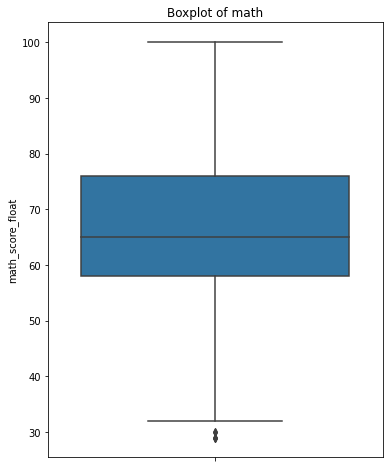

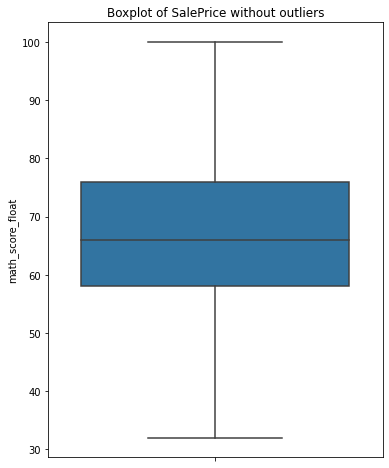

In [46]:
plt.figure(figsize=(6, 8))
sns.boxplot(y=df['math_score_float'])
plt.ylabel('math_score_float')
plt.title('Boxplot of math')
plt.show()

# Calculate IQR
Q1 = df['math_score_float'].quantile(0.25)
Q3 = df['math_score_float'].quantile(0.75)
IQR = Q3 - Q1

# Define limits to identify outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df['math_score_float'] >= lower_limit) & (df['math_score_float'] <= upper_limit)]

# Create a boxplot again without outliers
plt.figure(figsize=(6, 8))
sns.boxplot(y=df['math_score_float'])
plt.ylabel('math_score_float')
plt.title('Boxplot of SalePrice without outliers')
plt.show()

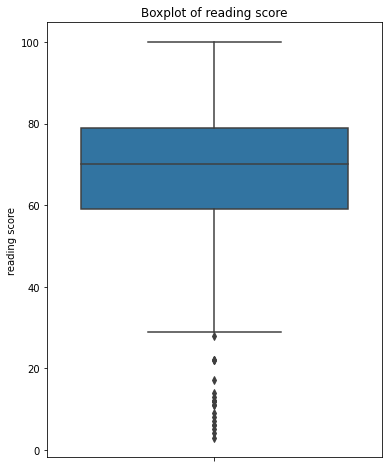

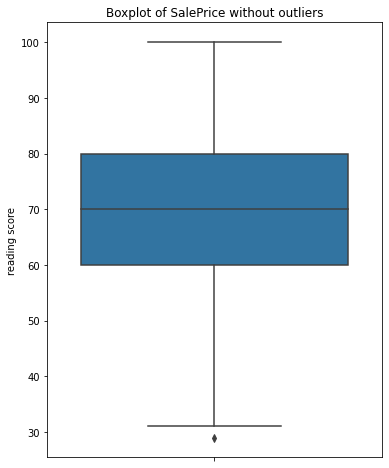

In [47]:
plt.figure(figsize=(6, 8))
sns.boxplot(y=df['reading score'])
plt.ylabel('reading score')
plt.title('Boxplot of reading score')
plt.show()

# Calculate IQR
Q1 = df['reading score'].quantile(0.25)
Q3 = df['reading score'].quantile(0.75)
IQR = Q3 - Q1

# Define limits to identify outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df['reading score'] >= lower_limit) & (df['reading score'] <= upper_limit)]

# Create a boxplot again without outliers
plt.figure(figsize=(6, 8))
sns.boxplot(y=df['reading score'])
plt.ylabel('reading score')
plt.title('Boxplot of SalePrice without outliers')
plt.show()

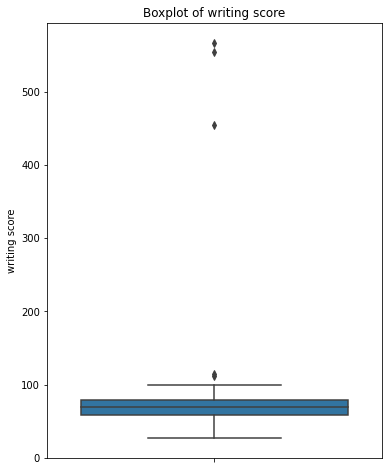

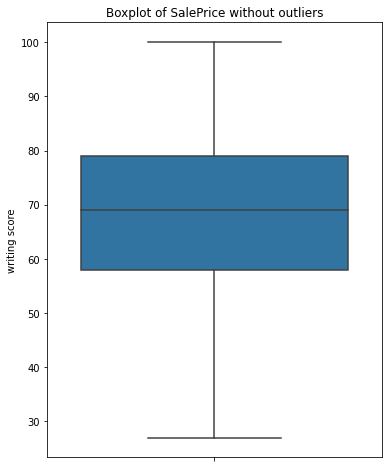

In [48]:
plt.figure(figsize=(6, 8))
sns.boxplot(y=df['writing score'])
plt.ylabel('writing score')
plt.title('Boxplot of writing score')
plt.show()

# Calculate IQR
Q1 = df['writing score'].quantile(0.25)
Q3 = df['writing score'].quantile(0.75)
IQR = Q3 - Q1

# Define limits to identify outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df['writing score'] >= lower_limit) & (df['writing score'] <= upper_limit)]

# Create a boxplot again without outliers
plt.figure(figsize=(6, 8))
sns.boxplot(y=df['writing score'])
plt.ylabel('writing score')
plt.title('Boxplot of SalePrice without outliers')
plt.show()

### Data Transformation

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

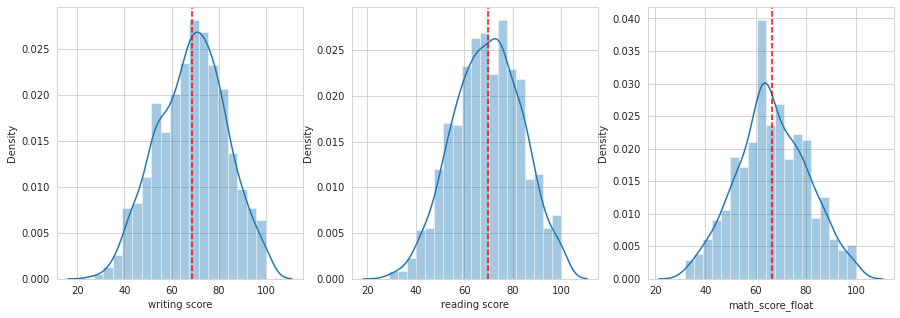

In [68]:
fig, axes = plt.subplots(1,3, figsize=(15,5))

sns.distplot(df['writing score'], ax=axes[0])
axes[0].axvline(df['writing score'].mean(), color='r', linestyle='--')

sns.distplot(df['reading score'], ax=axes[1])
axes[1].axvline(df['reading score'].mean(), color='r', linestyle='--')

sns.distplot(df['math_score_float'], ax=axes[2])
axes[2].axvline(df['math_score_float'].mean(), color='r', linestyle='--')

plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Z_Score_Write', ylabel='Density'>

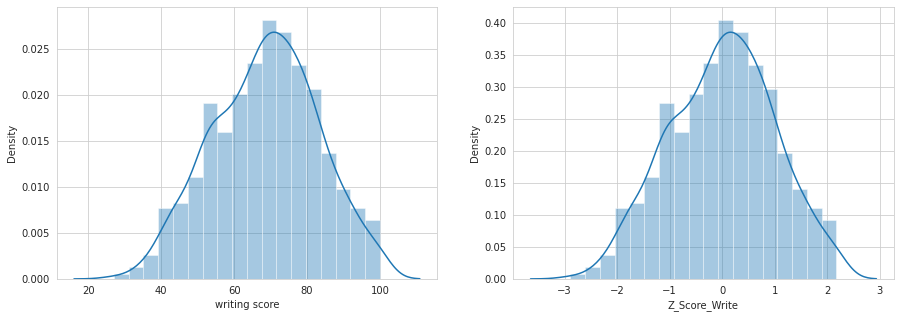

In [79]:
#Standardization (Z-Score)

avg_write = df['writing score'].mean()

std_write = df['writing score'].std()

df['Z_Score_Write'] = (df['writing score'] - avg_write)/std_write

fig, axes = plt.subplots(1,2, figsize=(15,5))

sns.distplot(df['writing score'], ax=axes[0])
sns.distplot(df['Z_Score_Write'], ax=axes[1])
